In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import pandas as pd

import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MA615_F21_Project_Final.csv to MA615_F21_Project_Final.csv


Precipitation_Binary Classification

In [ ]:
df=pd.read_csv('MA615_F21_Project_Final.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86640 entries, 0 to 86639
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date_Time               86640 non-null  object 
 1   Surface_Pressure        86640 non-null  float64
 2   DewPointTemperature     86640 non-null  int64  
 3   Temperature             86640 non-null  int64  
 4   HourlyPrecipitation     86640 non-null  float64
 5   HourlyPressureChange    86640 non-null  float64
 6   HourlyPreureTendency    86640 non-null  int64  
 7   HourlyRelativeHumidity  86640 non-null  int64  
 8   HourlyseaLevelPreure    86640 non-null  float64
 9   HourlyVisibility        86640 non-null  float64
 10  HourlyWindDirection     86640 non-null  object 
 11  Precipitation_Binary    86640 non-null  int64  
 12  HourlyWindSpeed         86640 non-null  int64  
 13  WindDirectionSegmant4   86640 non-null  object 
 14  WindDirectionSegmant16  86640 non-null

In [ ]:
X = df[['Surface_Pressure','DewPointTemperature','Temperature','HourlyPrecipitation','HourlyPressureChange','HourlyRelativeHumidity','HourlyVisibility','HourlyWindSpeed']].to_numpy()
X[0:5]

array([[30.22, 53.  , 54.  ,  0.  ,  0.  , 97.  ,  7.  ,  3.  ],
       [30.21, 51.  , 53.  ,  0.  ,  0.  , 93.  ,  5.  ,  0.  ],
       [30.21, 50.  , 51.  ,  0.  ,  0.  , 96.  ,  5.  ,  0.  ],
       [30.22, 50.  , 52.  ,  0.  ,  0.  , 93.  ,  5.  ,  0.  ],
       [30.23, 50.  , 52.  ,  0.  ,  0.  , 93.  ,  8.  ,  0.  ]])

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.20514502e+00, -9.83353286e-01, -1.64992972e+00,
        -1.03089924e-01, -2.18921673e-03,  1.10716447e+00,
        -1.38258577e+00, -7.07368363e-01],
       [ 1.12841324e+00, -1.15858208e+00, -1.74194473e+00,
        -1.03089924e-01, -2.18921673e-03,  8.65025536e-01,
        -2.54562151e+00, -1.31594590e+00],
       [ 1.12841324e+00, -1.24619648e+00, -1.92597474e+00,
        -1.03089924e-01, -2.18921673e-03,  1.04662973e+00,
        -2.54562151e+00, -1.31594590e+00],
       [ 1.20514502e+00, -1.24619648e+00, -1.83395973e+00,
        -1.03089924e-01, -2.18921673e-03,  8.65025536e-01,
        -2.54562151e+00, -1.31594590e+00],
       [ 1.28187680e+00, -1.24619648e+00, -1.83395973e+00,
        -1.03089924e-01, -2.18921673e-03,  8.65025536e-01,
        -8.01067909e-01, -1.31594590e+00]])

In [ ]:
y=df["Precipitation_Binary"].to_numpy()
y[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
TS=TimeseriesGenerator(X,y,length=4,sampling_rate=1,batch_size=16)
TS[0]

(array([[[ 1.20514502e+00, -9.83353286e-01, -1.64992972e+00,
          -1.03089924e-01, -2.18921673e-03,  1.10716447e+00,
          -1.38258577e+00, -7.07368363e-01],
         [ 1.12841324e+00, -1.15858208e+00, -1.74194473e+00,
          -1.03089924e-01, -2.18921673e-03,  8.65025536e-01,
          -2.54562151e+00, -1.31594590e+00],
         [ 1.12841324e+00, -1.24619648e+00, -1.92597474e+00,
          -1.03089924e-01, -2.18921673e-03,  1.04662973e+00,
          -2.54562151e+00, -1.31594590e+00],
         [ 1.20514502e+00, -1.24619648e+00, -1.83395973e+00,
          -1.03089924e-01, -2.18921673e-03,  8.65025536e-01,
          -2.54562151e+00, -1.31594590e+00]],
 
        [[ 1.12841324e+00, -1.15858208e+00, -1.74194473e+00,
          -1.03089924e-01, -2.18921673e-03,  8.65025536e-01,
          -2.54562151e+00, -1.31594590e+00],
         [ 1.12841324e+00, -1.24619648e+00, -1.92597474e+00,
          -1.03089924e-01, -2.18921673e-03,  1.04662973e+00,
          -2.54562151e+00, -1.31594590e+

In [ ]:
len(TS)

5415

In [ ]:
TS=TimeseriesGenerator(X,y,length=4,sampling_rate=1,batch_size=1,stride=1)

In [ ]:
len(TS)

86636

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate= train_test_split(X,y,test_size=0.20,random_state=23,shuffle=False)

In [ ]:

y_validate.shape

(17328,)

In [ ]:
X_validate_1, X_test, y_validate_1, y_test= train_test_split(X_validate,y_validate,test_size=0.50,random_state=23,shuffle=False)

In [ ]:
y_validate_1.shape

(8664,)

In [ ]:
X_train.shape

(69312, 8)

In [ ]:
Window=4
batch_size=16
num_features=8
train=TimeseriesGenerator(X_train,y_train,length=Window,sampling_rate=1,batch_size=batch_size)
test=TimeseriesGenerator(X_validate_1,y_validate_1,length=Window,sampling_rate=1,batch_size=batch_size)
test_1=TimeseriesGenerator(X_test,y_test,length=Window,sampling_rate=1,batch_size=batch_size)


In [ ]:
train[0]

(array([[[ 1.20514502, -0.98335329, -1.64992972, ...,  1.10716447,
          -1.38258577, -0.70736836],
         [ 1.12841324, -1.15858208, -1.74194473, ...,  0.86502554,
          -2.54562151, -1.3159459 ],
         [ 1.12841324, -1.24619648, -1.92597474, ...,  1.04662973,
          -2.54562151, -1.3159459 ],
         [ 1.20514502, -1.24619648, -1.83395973, ...,  0.86502554,
          -2.54562151, -1.3159459 ]],
 
        [[ 1.12841324, -1.15858208, -1.74194473, ...,  0.86502554,
          -2.54562151, -1.3159459 ],
         [ 1.12841324, -1.24619648, -1.92597474, ...,  1.04662973,
          -2.54562151, -1.3159459 ],
         [ 1.20514502, -1.24619648, -1.83395973, ...,  0.86502554,
          -2.54562151, -1.3159459 ],
         [ 1.2818768 , -1.24619648, -1.83395973, ...,  0.86502554,
          -0.80106791, -1.3159459 ]],
 
        [[ 1.12841324, -1.24619648, -1.92597474, ...,  1.04662973,
          -2.54562151, -1.3159459 ],
         [ 1.20514502, -1.24619648, -1.83395973, ...,  0.8

In [ ]:
import tensorflow as tf
model = Sequential()
# Recurrent layer
model.add(tf.keras.layers.LSTM(64, return_sequences=True,
stateful=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(32, input_shape=(Window,num_features), return_sequences=False))
# Output layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer='Adam', loss='binary_crossentropy',
metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history= model.fit_generator(train, validation_data=test, shuffle=False, epochs=200, callbacks=[early_stopping])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/200
4332/4332 [==============================] - 46s 10ms/step - loss: 0.1006 - binary_accuracy: 0.9688 - precision_2: 0.7779 - recall_2: 0.4410 - val_loss: 0.1393 - val_binary_accuracy: 0.9555 - val_precision_2: 0.7022 - val_recall_2: 0.4358
Epoch 2/200
4332/4332 [==============================] - 42s 10ms/step - loss: 0.0996 - binary_accuracy: 0.9692 - precision_2: 0.7806 - recall_2: 0.4524 - val_loss: 0.1393 - val_binary_accuracy: 0.9557 - val_precision_2: 0.7070 - val_recall_2: 0.4319
Epoch 3/200
4332/4332 [==============================] - 43s 10ms/step - loss: 0.0980 - binary_accuracy: 0.9696 - precision_2: 0.7880 - recall_2: 0.4575 - val_loss: 0.1425 - val_binary_accuracy: 0.9542 - val_precision_2: 0.6881 - val_recall_2: 0.4163
Epoch 4/200
4332/4332 [==============================] - 43s 10ms/step - loss: 0.0970 - binary_accuracy: 0.9699 - precision_2: 0.7917 - recall_2: 0.4628 - val_loss: 0.1435 - val_binary_accuracy: 0.9540 - val_precision_2: 0.6747 - val_recall_2: 0.4

dict_keys(['loss', 'binary_accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_binary_accuracy', 'val_precision_1', 'val_recall_1'])


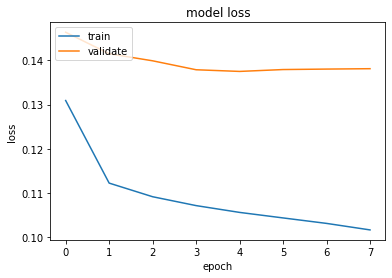

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validate'], loc='upper left')
plt.show()

In [ ]:
model.evaluate_generator(test_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.10011153668165207,
 0.9698614478111267,
 0.7363184094429016,
 0.4157303273677826]

In [ ]:
predictions=model.predict_generator(test_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
predictions.shape[0]

8660

In [ ]:
predictions

array([[0.01391343],
       [0.01583382],
       [0.00804501],
       ...,
       [0.00516512],
       [0.00345826],
       [0.00187186]], dtype=float32)

In [ ]:
predictions.shape

(8660, 1)

In [ ]:
y_test.shape

(8664,)

In [ ]:
import numpy as np

index = [0, 1, 2,3]
y_test = np.delete(y_test, index)


In [ ]:
y_test.shape

(8660,)

In [ ]:
pred_nn=np.rint(predictions)
pred_nn

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test, pred_nn)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98      8304\n           1       0.74      0.42      0.53       356\n\n    accuracy                           0.97      8660\n   macro avg       0.86      0.70      0.76      8660\nweighted avg       0.97      0.97      0.97      8660\n'

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_nn)

array([[8251,   53],
       [ 208,  148]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_nn)

0.9698614318706698

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, pred_nn)

0.736318407960199

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, pred_nn)

0.4157303370786517

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_nn)

0.5314183123877917

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_nn)

0.7046739353986706

Wind Direction Prediction

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import TimeseriesGenerator

def wd_preprocessing:
  df['WindDirectionSegmant4'].value_counts()
  y=df["WindDirectionSegmant4"].to_numpy()
  y = LabelEncoder().fit_transform(y)
  TS=TimeseriesGenerator(X,y,length=4,sampling_rate=1,batch_size=16)
  TS=TimeseriesGenerator(X,y,length=4,sampling_rate=1,batch_size=1,stride=1)

SW        19489
NE        18551
NW        18260
CALM      17805
SE        12483
NODATA       52
Name: WindDirectionSegmant4, dtype: int64

In [ ]:
len(TS)

86636

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate= train_test_split(X,y,test_size=0.20,random_state=23,shuffle=False)

In [ ]:
X_validate_1, X_test, y_validate_1, y_test= train_test_split(X_validate,y_validate,test_size=0.50,random_state=23,shuffle=False)

In [ ]:
Window=4
batch_size=32
num_features=8
train=TimeseriesGenerator(X_train,y_train,length=Window,sampling_rate=1,batch_size=batch_size)
test=TimeseriesGenerator(X_validate_1,y_validate_1,length=Window,sampling_rate=1,batch_size=batch_size)
test_1=TimeseriesGenerator(X_test,y_test,length=Window,sampling_rate=1,batch_size=batch_size)


In [ ]:
import tensorflow as tf
model = Sequential()
# Recurrent layer
model.add(tf.keras.layers.Conv1D(filters=10, kernel_size=3, strides=1, padding="valid", input_shape=(Window,num_features)))
model.add(tf.keras.layers.LSTM(32, return_sequences=True,
stateful=False))
model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, input_shape=(Window,num_features), return_sequences=True,
stateful=False))
model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(32, input_shape=(Window,num_features), return_sequences=False))
# Fully connected layer
model.add(tf.keras.layers.Dropout(0.3))
# Output layer
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 10)             250       
                                                                 
 lstm (LSTM)                 (None, 2, 32)             5504      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2, 32)             0         
                                                                 
 dropout (Dropout)           (None, 2, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 2, 64)             24832     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 2, 64)             0         
                                                                 
 dropout_1 (Dropout)         (None, 2, 64)             0

In [ ]:
early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
metrics=[tf.keras.metrics.BinaryAccuracy()])
##metrics=['accuracy'])
history= model.fit_generator(train, validation_data=test, shuffle=False, epochs=200, callbacks=[early_stopping])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/200
2166/2166 [==============================] - 27s 10ms/step - loss: 1.2280 - binary_accuracy: 0.2026 - val_loss: 1.2601 - val_binary_accuracy: 0.1864
Epoch 2/200
2166/2166 [==============================] - 21s 9ms/step - loss: 1.2125 - binary_accuracy: 0.2027 - val_loss: 1.2393 - val_binary_accuracy: 0.1854
Epoch 3/200
2166/2166 [==============================] - 21s 9ms/step - loss: 1.1959 - binary_accuracy: 0.2032 - val_loss: 1.2216 - val_binary_accuracy: 0.1864
Epoch 4/200
2166/2166 [==============================] - 20s 9ms/step - loss: 1.1833 - binary_accuracy: 0.2038 - val_loss: 1.2049 - val_binary_accuracy: 0.1868
Epoch 5/200
2166/2166 [==============================] - 20s 9ms/step - loss: 1.1710 - binary_accuracy: 0.2047 - val_loss: 1.1944 - val_binary_accuracy: 0.1866
Epoch 6/200
2166/2166 [==============================] - 20s 9ms/step - loss: 1.1652 - binary_accuracy: 0.2050 - val_loss: 1.1844 - val_binary_accuracy: 0.1868
Epoch 7/200
2166/2166 [================